<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/01_A_Persona_Based_Neural_Conversation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Persona-Based Neural Conversation Model

오픈 도메인 대화에서 페르소나를 설정해주는 방법론에 대한 내용


##Introduction 

오픈도메인에서 자연스러운 대화를 위한 연구를 진행되면서 문제점이 발견됨

데이터 기반 시스템의 문제 : training data 중 가장 가능성이 높은 응답을 선택 
    1. 결과가 모호함
    2. 일관성이 없음

 Challenge 
    1. consistency : 일관성문제 
    2. coherent persona : 일관된 페르소나를 부여하는 방법




Persona  : 


2개의 persona-based model 제안 
1. Speaker model : 대답을 제공하는 speaker의 persona 임베딩 
2. Speaker-Addressee model : speaker + addressee(대화하는 상대)의 persona 임베딩


##Related work

1. Data-driven response generation in social media : 대화의 생성 문제를 통계적 기계 번역 문제로 취급한 것 , 사람의 개입없이 학습함 

2. A neural network approach to context-sensitive generation of conversational responses : Ritter et al의 확장 연구 , continuous RLM을 사용해 과거의 대화 내용을 기반으로 다음 대답을 생성하는 방법

3. Building end-to-end dialogue systems using generative hierarchical neural network models : 확장된 대화 기록에 대한 종속성을 파악하기 위해 hierarchical neural model 을 제안 

4. All the World's a Stage : Learning Character Models from Film : 영화스크립트를 기반으로 캐릭터 유형에 따른 모델을 학습 

5. 최근 관련 연구 : 논문을 인용한 papers 
데이터 셋의 구축을 통해 페르소나 문제를 해결해보자 
    1. Personalizinf Dialogue Agents : Crowd-sourcing으로 페르소나 데이터셋 구축
    2. Training Millions of Personalized Dialogue Agents : Crowd-sourcing은 부족, Reddit 데이터를 이용해서 대량의 페르소나 데이터셋 구축 



##Datasets

논문 정리 : 기본적으로 응답을 생성하는 대화모델 , 질문이나 선행하는 대화문이 입력으로 들어왔을때, 그에 대한 응답을 생성함 ,
단순히 가능성이 높은 일반적인 응답을 생성하는 것이 아니라 화자에 맞는 일관되면서 화자에 해당하는 페르소나에 적합한 응답을 생성하는 것을 목표로하는 모델을 구축 



제안하는 페르소나 모델은 LSTM cell로 이루어진 seq2seq 구조를 띄고 있음.
1. Twitter Sordoni Dataset : LSTM model(non-persona) 비교용

2. Twitter Persona Dataset : 
    - Speaker Model 학습용,  : 화자의 정보를 중점적으로 반영해서 응답을 적절히 생성하는 모델
    - 6개월 분량의 트위터 , 
    - 사용자가 주고 받은 발화와 해당 사용자의 인덱스 포함 
    - 발화가 어떤 화자로부터 생성되어 있는 문장인지 잘 인덱싱 해주는게 포커스였음. 
    - Addressee 발화

3. Television Series Transcripts : 
    - Speaker-Addressess Model 학습용 ,
    - IMSDb, 
    - 미국 TV 코메디 '프렌즈','빅뱅이론' 대본 , 화자뿐만 아니라 상대방도 같이 고려하는 페르소나 모델을 구축하기 위한 만들어진 데이터 
    - 단순히 2명이 쌍을 지어서 발화하는것을 넘어 1명의 화자가 다양한 상대방과 대화하는 것을 고려할 수 있게 만들어진 데이터 셋 


##Model

1. 논문에서 제안하는 화자의 페르소나를 고려한 응답생성 모델
2. 본 논문의 모델은 LSTM cell로 구성된 Seq2Seq 구조를 가지고 있음 
3. 크게 두 종류의 모델을 제안
    1. Speaker Model : 
        - 일관성 있는 응답을 생성하기 위해서 응답을 생성할 차례인 화자의 페르소나를 고려함 
        - 각 화자가 발화한 문장들을 바탕으로 화자를 특징짓는 모델 
    2. Speaker-Addressee Model:
        - 응답을 내놓는 화자뿐만 아니라 함께 대화하고 있는 상대방도 고려를해서 모델에 반영을 함 
        - 각 화자가 상대방에 따라 발화한 문장들을 바탕으로 화자를 특징짓는 모델 
        - 누구랑 대화하는지에 따라 발화하는 태도가 변화함 그렇기 때문에 두개의 페르소나 모델을 상정을 함 


페르소나 구성은 쉽게는 성별, 나이, 국적, 가족관계 등 으로도 화자를 이해할 수 있지만 이런것들은 하나하나 정보를 구축해야하기 때문에 그런 시간과 비용을 소모하지 않고 데이터 기반의 방법론을 기반하기 위해 화자가 발화한 문장이 곧 화자를 나타내는 특징이다 라고 생각을 하고 발화문장을 페르소나를 이해하는 단서로 사용함 

따라서 화자가 발화한 문장을 바탕으로 화자의 특성을 벡터화 
화자의 특성을 고려하여 대화의 응답을 생성 


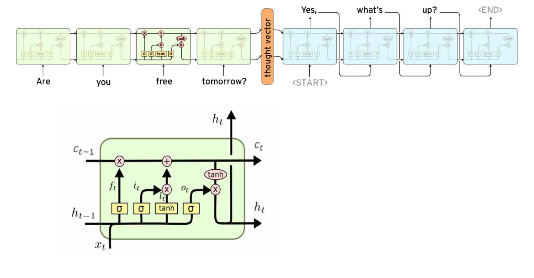

 LSTM의 경우 매 시점 기억할 정보나 잊어도 되는 정보를 분별하여 처리를 하여 길이가 긴 문장의 경우도 데이터를 잘 보관하는 모델에 해당

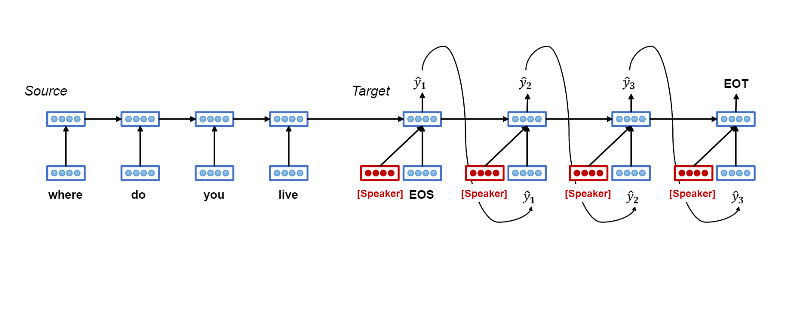

본 논문에서 제안하는 페르소나 모델은 일반적인 Seq2Seq 모델의 모습의 디코더에서 인풋이 들어갈 때 워드벡터뿐만 아니라 Speaker의 화자벡터가 같이 인풋으로 들어가는 형태로 구성되어있음.


1) Speaker Model 
- 응답을 내놓게 되는 화자의 화자벡터를 디코더의 인풋과 함께 넣어주는 모델 
- 화자에 맞는 적합한 응답을 출력할 수 있도록 목표함.


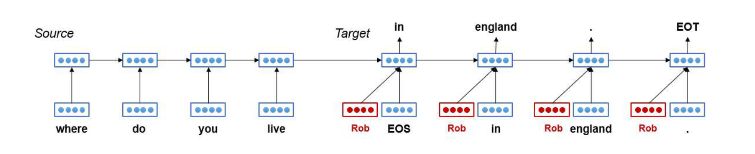

2) Speaker-Addressee Model 
    - 각 화자가 상대방에 따라 발화한 문장들을 바탕으로 화자를 특징짓는 모델 
    - 

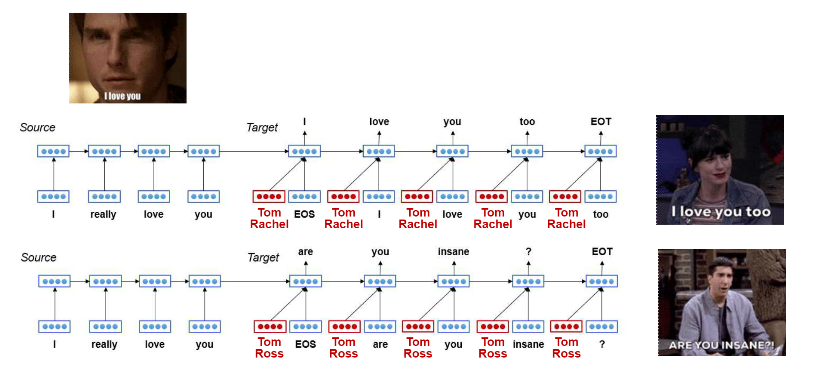

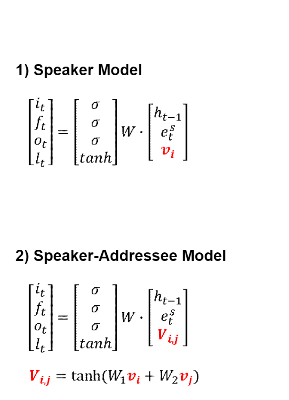

Reranking 
- 포괄적이고 일반적인 답변 위주의 생성을 보완하기 위해 
- Beam search 과정에서 가능성 높은 B개를 reranking 함 


##Experiments

1. Evaluation 
    - BLEU 지표를 사용하여 평가 

2. Baseline : 제안 모델이 잘 동작하는지 판단 
    - Twitter Sordoni Dataset을 이용해서 평가

3. Results : 자신들이 만든 Twitter Persona Dataset을 이용하여 비교 
    - TV series dataset을 이용하여 비교 

4. Qualitative Analysis : 모델이 출력한 결과를 판단하는 파트
    - Diverse REsponses by Different Speakers
    - Human Evaluation




##Conclusion

- Open-domain 대화 생성을 위한 두 가지 Persona 모델을 제시함.
- 기분, 감정과 같은 추가적인 특징은 future work
- BLEU, Perplexity, 인적 평가에서 Speaker의 Consistency는 Baseline보다 뛰어남.
- Persona모델이 개인적 특성을 포착할 수 있음을 보여줌.
- Speaker-Addressee모델에서는 이원적 특성을 포착할 수 있음을 보여줌.

참고 : https://www.youtube.com/watch?v=xZYXWBHoPwI